# Workshop 4

We want to study the correlation between the transport costs (Y) and the fuel cost per transport unit (X), let's start by importing the necessary libraries and the data

In [1]:
import pandas as pd
from numpy import arange, mean, var, pi, exp
from seaborn import distplot
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
data = pd.DataFrame({
    'Fuel Cost per Transport Unit' : [11.5, 12.7, 15.9, 17.8, 19.1, 21.5, 31.9, 33.1, 40.9, 50.9, 61.8],
    'Transport Costs' : [127.5, 131.9, 140.8, 160.4, 179.7, 210.5, 222.7, 272.4, 280.9, 302.1, 319.1]
})
data

,Fuel Cost per Transport Unit,Transport Costs
0,11.5,127.5
1,12.7,131.9
2,15.9,140.8
3,17.8,160.4
4,19.1,179.7
5,21.5,210.5
6,31.9,222.7
7,33.1,272.4
8,40.9,280.9
9,50.9,302.1


## Correlation

We wanto to study the correlation between the two variables, so we'll define a correlation array and visualize the scatter plot 

In [5]:
data[['Fuel Cost per Transport Unit', 'Transport Costs']].corr(method='pearson')

,Fuel Cost per Transport Unit,Transport Costs
Fuel Cost per Transport Unit,1.000000,0.953233
Transport Costs,0.953233,1.000000


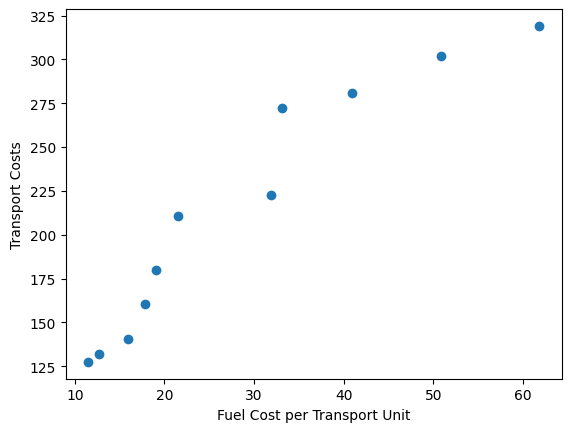

In [6]:
plt.scatter(data['Fuel Cost per Transport Unit'], data['Transport Costs'])
plt.xlabel('Fuel Cost per Transport Unit')
plt.ylabel('Transport Costs')
plt.show()

The variables are almost perfectly correlated, let's verify by using a box plot if there are "outliners" inside the data, if not we'll be able to apply the linear regression model

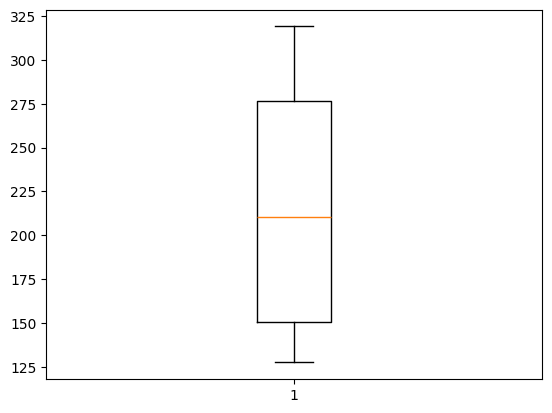

In [7]:
plt.boxplot(data['Transport Costs'])
plt.show()

## Linear Regression

Now that we've verified that the variables are correlated and there are not "outliners", we can apply the model

In [9]:
x = sm.add_constant(data['Fuel Cost per Transport Unit'])
model = sm.OLS(data['Transport Costs'], x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Transport Costs   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     89.53
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           5.66e-06
Time:                        07:58:28   Log-Likelihood:                -48.811
No. Observations:                  11   AIC:                             101.6
Df Residuals:                       9   BIC:                             102.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


We can observe that:
- **R-squared** is almost 91%, it means that 91% of the transport costs depend on the fuel cost per transport unit
- **P>|t|** is equal to 0%, so we can infer that the model specification is statistically significative
- **Prob (F-statistic)** is almost 0%, the fuel cost per transport unit is useful to describe the transport costs

\> We can affirm that the model is able to make predictions and the correlation between the variables is defined as follow:

$ \text{Transport Costs} = 95.7024 + 4.0847 * \text{Fuel Cost per Transport Unit} $

**Interpretation** - For every € spent more for fuel cost per transport unit we expect an increase in trasport costs of 4.0847. So 95.7024 represent the transport costs if we don't spend money for fuel.

### Residues Analysis

Now that we have defined the model, we want to verify the residues' influence in order to confirm its statistical significativity. Residues have to follow a normal distribution with a mean equal to zero and an homogeneus variance, it's also very important to verify that they are not correlated with the regressor.

In [16]:
round(mean(model.resid), 1)

-0.0

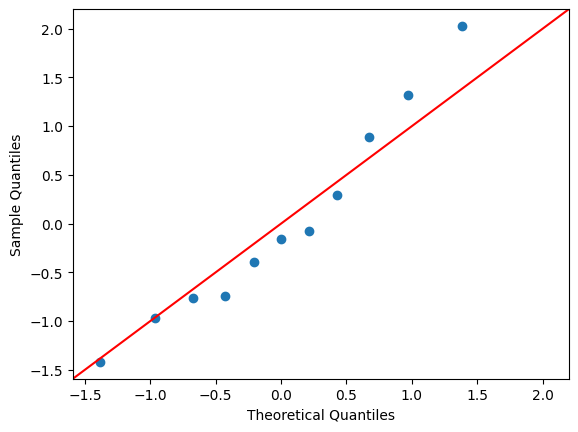

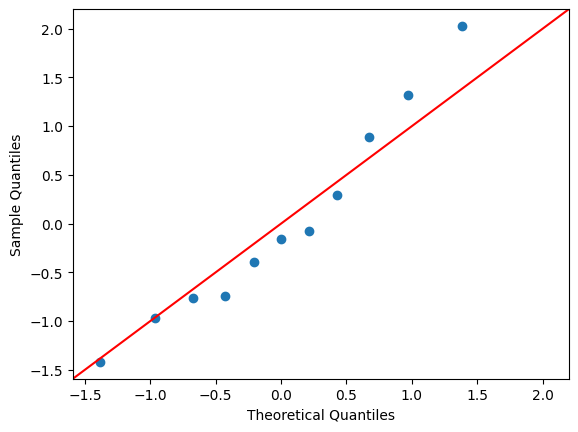

In [17]:
sm.qqplot(model.resid, fit=True, line='45')

/var/folders/nh/n6q2x6014vdcdzf5d63x80j40000gn/T/ipykernel_9569/3021316141.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  distplot(z)


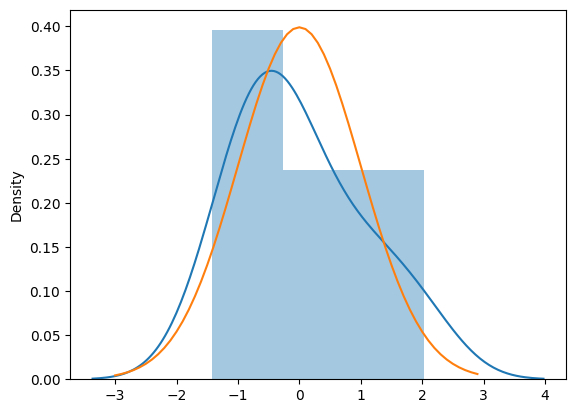

In [20]:
# blue line seems to follow a normal distribution
z = (model.resid - mean(model.resid))/var(model.resid)**.5
distplot(z)
x = arange(-3, +3, .1)
plt.plot(x, ((2*pi)**-.5)*exp(-.5*(x**2)))
plt.show()

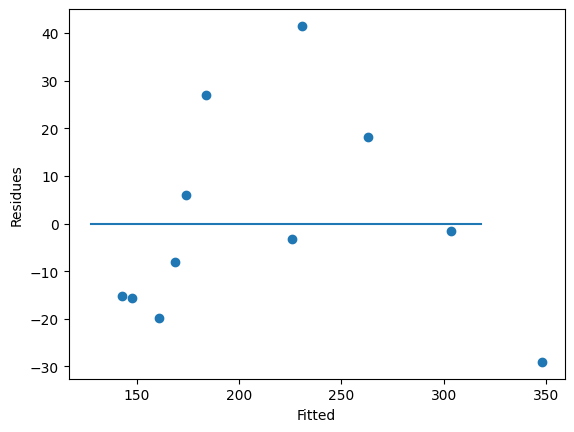

In [22]:
plt.scatter(model.fittedvalues, model.resid)
plt.plot(arange(min(data['Transport Costs']), max(data['Transport Costs'])), [mean(model.resid) for i in arange(min(data['Transport Costs']), max(data['Transport Costs']))])
plt.xlabel('Fitted')
plt.ylabel('Residues')
plt.show()

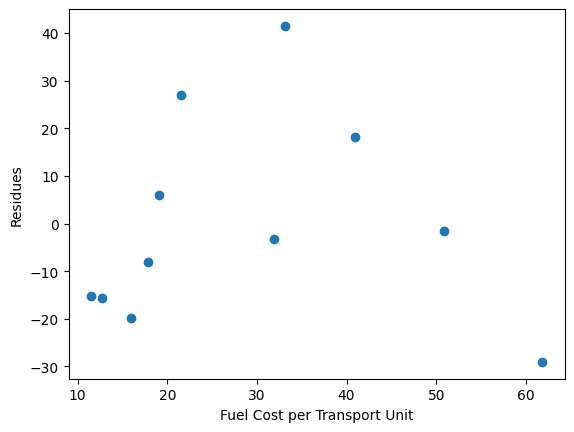

In [23]:
plt.scatter(data['Fuel Cost per Transport Unit'], model.resid)
plt.xlabel('Fuel Cost per Transport Unit')
plt.ylabel('Residues')
plt.show()

### Model Confirmation

We have created the model and analized the residues, so we can confirm the linear regression

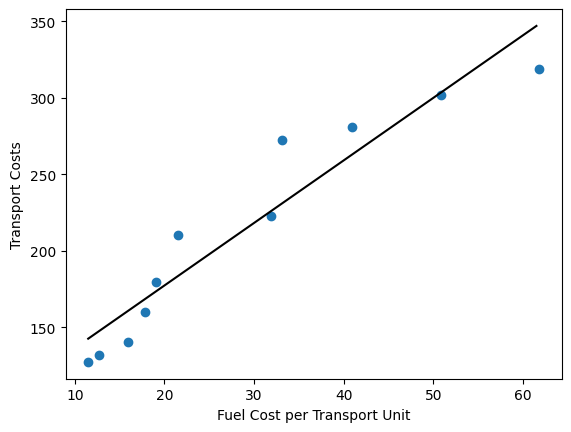

In [24]:
x = arange(min(data['Fuel Cost per Transport Unit']), max(data['Fuel Cost per Transport Unit']), 1)
a, b = model.params
plt.scatter(data['Fuel Cost per Transport Unit'], data['Transport Costs'])
plt.plot(x, a + b*x, color='k')
plt.xlabel('Fuel Cost per Transport Unit')
plt.ylabel('Transport Costs')
plt.show()